In [10]:
import pandas as pd 
import numpy as np
import anndata 
import matplotlib.pyplot as plt
import re

In [3]:
pseudo = pd.read_csv('../../data/pseudobulk/sum_pseudobulk.csv')

# Table view of pseudobulk for paul as an exampel

In [4]:
pseudo.round(5)

,Unnamed: 0,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,Tongue_epithelial cell,0.00000,2.59070,0.00000,3.45943,0.00000,0.00000,0.00000,0.00000,0.00000,...,11.97498,8.48602,0.00000,4.81830,11.93120,6.52146,6.74470,12.56298,9.90327,9.39840
1,Tongue_basal cell,1.75589,6.48451,0.00000,3.55448,0.00000,3.45943,3.45943,0.00000,3.45943,...,14.64096,11.12014,9.86312,7.14491,14.17016,12.87562,9.96359,14.71032,12.62468,11.50396
2,Tongue_immune cell,3.45943,7.43205,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,12.84339,8.05335,9.09081,6.68775,12.33199,11.02861,8.65787,12.91107,8.38920,9.88703
3,Tongue_fibroblast,0.00000,2.18089,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.39210,...,9.89851,5.55772,6.56680,5.89806,9.43071,7.91221,6.01448,9.97922,5.52766,6.80720
4,Tongue_vein endothelial cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,9.68337,6.08748,7.59787,5.50849,9.22013,7.60814,6.70080,9.81733,6.60040,6.44116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Liver_t cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.50813,...,8.52292,3.99351,6.93952,0.00000,8.26797,6.94078,3.71072,8.75120,0.00000,6.40817
470,Liver_neutrophil,0.00000,0.00000,0.00000,1.76017,0.00000,0.00000,0.00000,0.00000,0.00000,...,8.16816,0.00000,2.48875,0.00000,8.04003,7.54858,1.35879,8.10969,0.00000,4.13969
471,Liver_plasma cell,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,...,6.87463,2.05179,3.96837,0.00001,6.53924,5.17621,2.65019,6.98803,2.31062,3.84592
472,Liver_erythrocyte,0.00000,3.45943,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.70169,5.27448,5.21449,4.95420,6.55745,5.17614,5.07055,7.82797,5.42601,6.18340


In [18]:
comp=re.compile(".*hepa.*")
list(filter(comp.match, pseudo.iloc[:,0]))


['Heart_hepatocyte',
 'Liver_endothelial cell of hepatic sinusoid',
 'Liver_hepatocyte',
 'Liver_intrahepatic cholangiocyte']

In [14]:
pseudo.iloc[:,0]

0            Tongue_epithelial cell
1                 Tongue_basal cell
2                Tongue_immune cell
3                 Tongue_fibroblast
4      Tongue_vein endothelial cell
                   ...             
469                    Liver_t cell
470                Liver_neutrophil
471               Liver_plasma cell
472               Liver_erythrocyte
473          Liver_endothelial cell
Name: Unnamed: 0, Length: 474, dtype: object

# OP-celltype marginal distribution

In [8]:
pseudo.index = pseudo.iloc[:,0]

In [13]:
pseudo = pseudo.iloc[:,1:]

In [17]:
OPCT = pseudo.sum(axis =  1)

In [33]:
OPCT

Cell_Type
TS_Tongue_epithelial cell          1.0
TS_Tongue_basal cell               1.0
TS_Tongue_immune cell              1.0
TS_Tongue_fibroblast               1.0
TS_Tongue_vein endothelial cell    1.0
                                  ... 
TS_Liver_t cell                    1.0
TS_Liver_neutrophil                1.0
TS_Liver_plasma cell               1.0
TS_Liver_erythrocyte               1.0
TS_Liver_endothelial cell          1.0
Length: 474, dtype: float64

Text(0, 0.5, 'Number of OPCTs in bin')

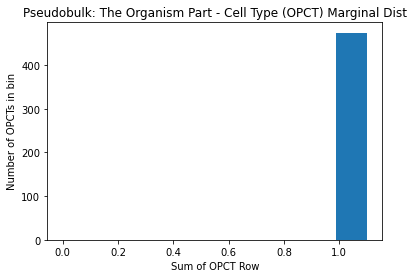

In [52]:
plt.hist(OPCT, bins = 10, range = (0,1.1) )
plt.title('Pseudobulk: The Organism Part - Cell Type (OPCT) Marginal Dist')
plt.xlabel('Sum of OPCT Row')
plt.ylabel('Number of OPCTs in bin')



# Marginal of Genes

In [54]:
genes = pseudo.sum(axis = 0)

In [55]:
genes

DDX11L1        0.000259
WASH7P         0.004162
MIR6859-1      0.000104
MIR1302-2HG    0.000116
MIR1302-2      0.000000
                 ...   
MT-ND6         0.086157
MT-TE          0.027946
MT-CYB         0.329035
MT-TT          0.017582
MT-TP          0.046022
Length: 58870, dtype: float64

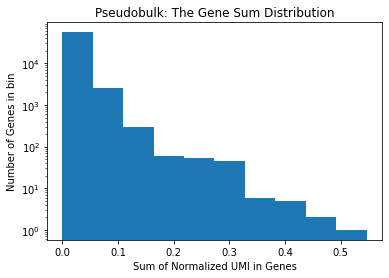

In [59]:
plt.hist(genes, bins = 10)
plt.title('Pseudobulk: The Gene Sum Distribution')
plt.xlabel('Sum of Normalized UMI of Genes')
plt.ylabel('Number of Genes in bin')
plt.yscale('log')


# Exploring Sum_Pseudobulk

In [60]:
sum_pseudo = pd.read_csv('../data/pseudobulk/sum_pseudobulk.csv')

### Table view of pseudobulk for paul as an exampel

In [61]:
sum_pseudo.round(5)

,Unnamed: 0,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,Tongue_epithelial cell,0.00000,2.59070,0.00000,3.45943,0.00000,0.00000,0.00000,0.00000,0.00000,...,11.97498,8.48602,0.00000,4.81830,11.93120,6.52146,6.74470,12.56298,9.90327,9.39840
1,Tongue_basal cell,1.75589,6.48451,0.00000,3.55448,0.00000,3.45943,3.45943,0.00000,3.45943,...,14.64096,11.12014,9.86312,7.14491,14.17016,12.87562,9.96359,14.71032,12.62468,11.50396
2,Tongue_immune cell,3.45943,7.43205,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,12.84339,8.05335,9.09081,6.68775,12.33199,11.02861,8.65787,12.91107,8.38920,9.88703
3,Tongue_fibroblast,0.00000,2.18089,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.39210,...,9.89851,5.55772,6.56680,5.89806,9.43071,7.91221,6.01448,9.97922,5.52766,6.80720
4,Tongue_vein endothelial cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,9.68337,6.08748,7.59787,5.50849,9.22013,7.60814,6.70080,9.81733,6.60040,6.44116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Liver_t cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.50813,...,8.52292,3.99351,6.93952,0.00000,8.26797,6.94078,3.71072,8.75120,0.00000,6.40817
470,Liver_neutrophil,0.00000,0.00000,0.00000,1.76017,0.00000,0.00000,0.00000,0.00000,0.00000,...,8.16816,0.00000,2.48875,0.00000,8.04003,7.54858,1.35879,8.10969,0.00000,4.13969
471,Liver_plasma cell,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,...,6.87463,2.05179,3.96837,0.00001,6.53924,5.17621,2.65019,6.98803,2.31062,3.84592
472,Liver_erythrocyte,0.00000,3.45943,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.70169,5.27448,5.21449,4.95420,6.55745,5.17614,5.07055,7.82797,5.42601,6.18340


### Processing

In [63]:
sum_pseudo.index = sum_pseudo.iloc[:,0]
sum_pseudo = sum_pseudo.iloc[:,1:]

In [65]:
round(sum_pseudo,5)

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Tongue_epithelial cell,0.00000,2.59070,0.00000,3.45943,0.00000,0.00000,0.00000,0.00000,0.00000,3.11356,...,11.97498,8.48602,0.00000,4.81830,11.93120,6.52146,6.74470,12.56298,9.90327,9.39840
Tongue_basal cell,1.75589,6.48451,0.00000,3.55448,0.00000,3.45943,3.45943,0.00000,3.45943,7.91408,...,14.64096,11.12014,9.86312,7.14491,14.17016,12.87562,9.96359,14.71032,12.62468,11.50396
Tongue_immune cell,3.45943,7.43205,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,12.84339,8.05335,9.09081,6.68775,12.33199,11.02861,8.65787,12.91107,8.38920,9.88703
Tongue_fibroblast,0.00000,2.18089,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.39210,3.45943,...,9.89851,5.55772,6.56680,5.89806,9.43071,7.91221,6.01448,9.97922,5.52766,6.80720
Tongue_vein endothelial cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,9.68337,6.08748,7.59787,5.50849,9.22013,7.60814,6.70080,9.81733,6.60040,6.44116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liver_t cell,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.50813,0.00000,...,8.52292,3.99351,6.93952,0.00000,8.26797,6.94078,3.71072,8.75120,0.00000,6.40817
Liver_neutrophil,0.00000,0.00000,0.00000,1.76017,0.00000,0.00000,0.00000,0.00000,0.00000,4.39232,...,8.16816,0.00000,2.48875,0.00000,8.04003,7.54858,1.35879,8.10969,0.00000,4.13969
Liver_plasma cell,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,...,6.87463,2.05179,3.96837,0.00001,6.53924,5.17621,2.65019,6.98803,2.31062,3.84592


In [66]:
sum_pseudo

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Tongue_epithelial cell,1.719826e-07,2.590695e+00,1.719826e-07,3.459432e+00,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,3.113560e+00,...,11.974978,8.486017,1.719826e-07,4.818303,11.931205,6.521457,6.744704,12.562985,9.903274,9.398400
Tongue_basal cell,1.755894e+00,6.484509e+00,0.000000e+00,3.554484e+00,0.000000e+00,3.459432e+00,3.459432e+00,0.000000e+00,3.459432e+00,7.914075e+00,...,14.640965,11.120138,9.863120e+00,7.144906,14.170165,12.875622,9.963591,14.710316,12.624679,11.503955
Tongue_immune cell,3.459432e+00,7.432054e+00,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,1.719826e-07,...,12.843388,8.053350,9.090807e+00,6.687752,12.331987,11.028606,8.657870,12.911067,8.389198,9.887032
Tongue_fibroblast,8.599130e-07,2.180892e+00,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,3.392105e+00,3.459432e+00,...,9.898511,5.557725,6.566801e+00,5.898065,9.430710,7.912210,6.014480,9.979225,5.527660,6.807204
Tongue_vein endothelial cell,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,8.599130e-07,...,9.683373,6.087481,7.597868e+00,5.508490,9.220134,7.608140,6.700799,9.817327,6.600399,6.441165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liver_t cell,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,1.719825e-06,2.508131e+00,1.719825e-06,...,8.522924,3.993513,6.939522e+00,0.000002,8.267967,6.940782,3.710717,8.751202,0.000002,6.408168
Liver_neutrophil,4.643524e-06,4.643524e-06,4.643524e-06,1.760166e+00,4.643524e-06,4.643524e-06,4.643524e-06,4.643524e-06,4.643524e-06,4.392318e+00,...,8.168155,0.000005,2.488751e+00,0.000005,8.040027,7.548580,1.358787,8.109688,0.000005,4.139691
Liver_plasma cell,9.115051e-06,9.115051e-06,9.115051e-06,9.115051e-06,9.115051e-06,9.115051e-06,9.115051e-06,9.115051e-06,9.115051e-06,9.115051e-06,...,6.874629,2.051786,3.968368e+00,0.000009,6.539243,5.176206,2.650192,6.988028,2.310617,3.845919
